Import All the Required Libraries

In [1]:
import pandas as pd
import pyfolio as pf
import numpy as np

C:\Users\gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Get the data of all the stocks from NSE Website as Pandas Dataframe

In [2]:
list_fno = pd.read_csv("https://archives.nseindia.com/content/fo/fo_mktlots.csv")


Extract the list of stocks and store it in a list

In [3]:
list_stocks = list(list_fno[5:]['SYMBOL    '])
for i in range(0,len(list_stocks)):
    list_stocks[i] = list_stocks[i].replace(" ","")

list_stocks

['ABCAPITAL',
 'ABB',
 'AARTIIND',
 'ASIANPAINT',
 'APOLLOTYRE',
 'ABFRL',
 'AUROPHARMA',
 'BANDHANBNK',
 'ASTRAL',
 'ABBOTINDIA',
 'AXISBANK',
 'BATAINDIA',
 'BEL',
 'GODREJCP',
 'HINDPETRO',
 'ASHOKLEY',
 'ICICIGI',
 'ACC',
 'ADANIENT',
 'ADANIPORTS',
 'AUBANK',
 'BAJFINANCE',
 'BALKRISIND',
 'ALKEM',
 'AMBUJACEM',
 'APOLLOHOSP',
 'BERGEPAINT',
 'COFORGE',
 'CUMMINSIND',
 'IPCALAB',
 'BAJAJFINSV',
 'BALRAMCHIN',
 'BANKBARODA',
 'DIVISLAB',
 'BHARATFORG',
 'BHARTIARTL',
 'BIOCON',
 'BOSCHLTD',
 'BPCL',
 'DIXON',
 'BSOFT',
 'EICHERMOT',
 'CANFINHOME',
 'CHAMBLFERT',
 'CHOLAFIN',
 'CIPLA',
 'COLPAL',
 'CONCOR',
 'ATUL',
 'COROMANDEL',
 'BAJAJ-AUTO',
 'CROMPTON',
 'CUB',
 'DABUR',
 'DALBHARAT',
 'GUJGASLTD',
 'DEEPAKNTR',
 'DELTACORP',
 'DRREDDY',
 'ESCORTS',
 'HCLTECH',
 'FEDERALBNK',
 'GAIL',
 'HDFCLIFE',
 'GLENMARK',
 'GMRINFRA',
 'GNFC',
 'GODREJPROP',
 'GRANULES',
 'HAL',
 'HAVELLS',
 'HDFC',
 'HDFCBANK',
 'HEROMOTOCO',
 'HINDALCO',
 'HINDCOPPER',
 'HINDUNILVR',
 'ICICIBANK',
 'ICIC

Getting all the data using Custom API for each script and saving in the data folder in csv format. 

In [4]:
from getdata import get_data
data = {}
l = 1
for i in list_stocks:
    data[i] = get_data(i)
    data[i].to_csv(f"data/{i}.csv",index=False)
    print(l,i)
    l+=1

1 ABCAPITAL
2 ABB
3 AARTIIND
4 ASIANPAINT
5 APOLLOTYRE
6 ABFRL
7 AUROPHARMA
8 BANDHANBNK
9 ASTRAL
10 ABBOTINDIA
11 AXISBANK
12 BATAINDIA
13 BEL
14 GODREJCP
15 HINDPETRO
16 ASHOKLEY
17 ICICIGI
18 ACC
19 ADANIENT
20 ADANIPORTS
21 AUBANK
22 BAJFINANCE
23 BALKRISIND
24 ALKEM
25 AMBUJACEM
26 APOLLOHOSP
27 BERGEPAINT
28 COFORGE
29 CUMMINSIND
30 IPCALAB
31 BAJAJFINSV
32 BALRAMCHIN
33 BANKBARODA
34 DIVISLAB
35 BHARATFORG
36 BHARTIARTL
37 BIOCON
38 BOSCHLTD
39 BPCL
40 DIXON
41 BSOFT
42 EICHERMOT
43 CANFINHOME
44 CHAMBLFERT
45 CHOLAFIN
46 CIPLA
47 COLPAL
48 CONCOR
49 ATUL
50 COROMANDEL
51 BAJAJ-AUTO
52 CROMPTON
53 CUB
54 DABUR
55 DALBHARAT
56 GUJGASLTD
57 DEEPAKNTR
58 DELTACORP
59 DRREDDY
60 ESCORTS
61 HCLTECH
62 FEDERALBNK
63 GAIL
64 HDFCLIFE
65 GLENMARK
66 GMRINFRA
67 GNFC
68 GODREJPROP
69 GRANULES
70 HAL
71 HAVELLS
72 HDFC
73 HDFCBANK
74 HEROMOTOCO
75 HINDALCO
76 HINDCOPPER
77 HINDUNILVR
78 ICICIBANK
79 ICICIPRULI
80 INDHOTEL
81 INDIACEM
82 INDIGO
83 INDUSINDBK
84 INFY
85 IDFC
86 INTELLECT
87

Function to convert the string to float and remove any comma for example converting "1,920.00" to 1920.00

In [5]:
def tofloat(x):
    if(isinstance(x,str)):
        x=x.replace(",","")
    return float(x)

Storing data from the csv to the dictionary and Converting the Close and Previous Close values to float using the above function and then adding the change column to show the % change in price that day. 
Only this method can be used once the data is downloaded using the API in the data folder.

In [6]:
data = {}
for i in list_stocks:
    data[i] = pd.read_csv(f"data/{i}.csv", parse_dates=['Date '])
    data[i].set_index("Date ", inplace = True)
    data[i]['close '] = data[i]['close '].apply(tofloat)
    data[i]['PREV. CLOSE '] = data[i]['PREV. CLOSE '].apply(tofloat)
    data[i]['change']= (data[i]['close ']-data[i]['PREV. CLOSE '])/data[i]['PREV. CLOSE ']


Storing the weekly data of all the stocks in a dataframe

In [7]:


weekly_data = pd.DataFrame()
for i in list_stocks:
    d= data[i]['close '].resample('W').last().to_frame()
    d['change'] = np.log(d['close ']/d['close '].shift(1))
    d = d.transpose().drop("close ")
    d['Name']=[i]
    d = d.set_index('Name')
    weekly_data = weekly_data.append(d)


Getting the top 5 performing stocks of the week and storing it in a dictionary for future use

In [8]:
top = {}

for column in weekly_data.columns:
    top_stocks = weekly_data[column].nlargest(5).index.tolist()
    top[column]=top_stocks

top.pop(list(top.keys())[0])


[]

Getting the stocks in the portfolio on a trading day i.e. the stocks in the portfolio on a particular trading day will the top 5 performing stocks of the previous week

In [9]:

dates = data['RELIANCE'].index.values.tolist()[::-1]
full_data = {}
for i in range(len(dates)):
    dates[i]=pd.to_datetime(dates[i])

i = 0
j= 0
keylist = list(top.keys())
while(j<len(dates)):
    
    if(dates[j]>keylist[i] and dates[j]<keylist[i+1]):
        full_data[dates[j]]=top[keylist[i]]
        j+=1
    elif(dates[j]<keylist[i]):
        j+=1
    elif(i<len(keylist)-1):
        i+=1
    else:
        break

daily_returns = (pd.DataFrame(full_data,index=['Stock1','Stock2','Stock3','Stock4','Stock5'])).transpose()



Getting the % change of each stock per day and storing it in a dataframe

In [10]:
for i in range(1, 6):
    stock_col = f'Stock{i}'
    return_col = f'Return{i}'
    ret = []
    for j in full_data:
        ret.append(data[full_data[j][i-1]].loc[j,'change'])
    daily_returns[return_col]=ret
        
        

daily_returns


,Stock1,Stock2,Stock3,Stock4,Stock5,Return1,Return2,Return3,Return4,Return5
2020-07-06,BEL,HAL,POLYCAB,HEROMOTOCO,TATAPOWER,0.051440,0.119076,-0.000828,0.011942,0.009018
2020-07-07,BEL,HAL,POLYCAB,HEROMOTOCO,TATAPOWER,-0.001468,0.027414,-0.009771,-0.007813,0.009930
2020-07-08,BEL,HAL,POLYCAB,HEROMOTOCO,TATAPOWER,0.014699,-0.035457,0.014712,-0.010948,0.026549
2020-07-09,BEL,HAL,POLYCAB,HEROMOTOCO,TATAPOWER,-0.035732,-0.016344,-0.002240,-0.010205,0.005747
2020-07-10,BEL,HAL,POLYCAB,HEROMOTOCO,TATAPOWER,-0.001502,0.013497,-0.010455,-0.003790,-0.041905
...,...,...,...,...,...,...,...,...,...,...
2023-06-20,IDFCFIRSTB,L&TFH,DIXON,TATACOMM,OFSS,0.018450,0.029200,-0.025048,0.013639,0.012240
2023-06-21,IDFCFIRSTB,L&TFH,DIXON,TATACOMM,OFSS,-0.007246,0.016859,0.010697,0.000496,-0.000908
2023-06-22,IDFCFIRSTB,L&TFH,DIXON,TATACOMM,OFSS,-0.055961,-0.025879,-0.030564,-0.022280,-0.013881
2023-06-23,IDFCFIRSTB,L&TFH,DIXON,TATACOMM,OFSS,0.001933,-0.020340,-0.027143,-0.010617,-0.010535


Computing the Average Portfolio Return on that day by taking the mean of the % change return of each stock.
Note - Assuming equal position in each stock

In [11]:
daily_returns['PortfolioReturn'] = (daily_returns['Return1']+daily_returns['Return2']+daily_returns['Return3']+daily_returns['Return4']+daily_returns['Return5'])/5
daily_returns

,Stock1,Stock2,Stock3,Stock4,Stock5,Return1,Return2,Return3,Return4,Return5,PortfolioReturn
2020-07-06,BEL,HAL,POLYCAB,HEROMOTOCO,TATAPOWER,0.051440,0.119076,-0.000828,0.011942,0.009018,0.038129
2020-07-07,BEL,HAL,POLYCAB,HEROMOTOCO,TATAPOWER,-0.001468,0.027414,-0.009771,-0.007813,0.009930,0.003658
2020-07-08,BEL,HAL,POLYCAB,HEROMOTOCO,TATAPOWER,0.014699,-0.035457,0.014712,-0.010948,0.026549,0.001911
2020-07-09,BEL,HAL,POLYCAB,HEROMOTOCO,TATAPOWER,-0.035732,-0.016344,-0.002240,-0.010205,0.005747,-0.011755
2020-07-10,BEL,HAL,POLYCAB,HEROMOTOCO,TATAPOWER,-0.001502,0.013497,-0.010455,-0.003790,-0.041905,-0.008831
...,...,...,...,...,...,...,...,...,...,...,...
2023-06-20,IDFCFIRSTB,L&TFH,DIXON,TATACOMM,OFSS,0.018450,0.029200,-0.025048,0.013639,0.012240,0.009696
2023-06-21,IDFCFIRSTB,L&TFH,DIXON,TATACOMM,OFSS,-0.007246,0.016859,0.010697,0.000496,-0.000908,0.003980
2023-06-22,IDFCFIRSTB,L&TFH,DIXON,TATACOMM,OFSS,-0.055961,-0.025879,-0.030564,-0.022280,-0.013881,-0.029713
2023-06-23,IDFCFIRSTB,L&TFH,DIXON,TATACOMM,OFSS,0.001933,-0.020340,-0.027143,-0.010617,-0.010535,-0.013340


Backtest Result using Pyfolio

Start date,2020-07-06
End date,2023-06-26
Total months,35
,Backtest
Annual return,-7.7%
Cumulative returns,-21.0%
Annual volatility,36.9%
Sharpe ratio,-0.03
Calmar ratio,-0.32
Stability,0.89
Max drawdown,-24.4%


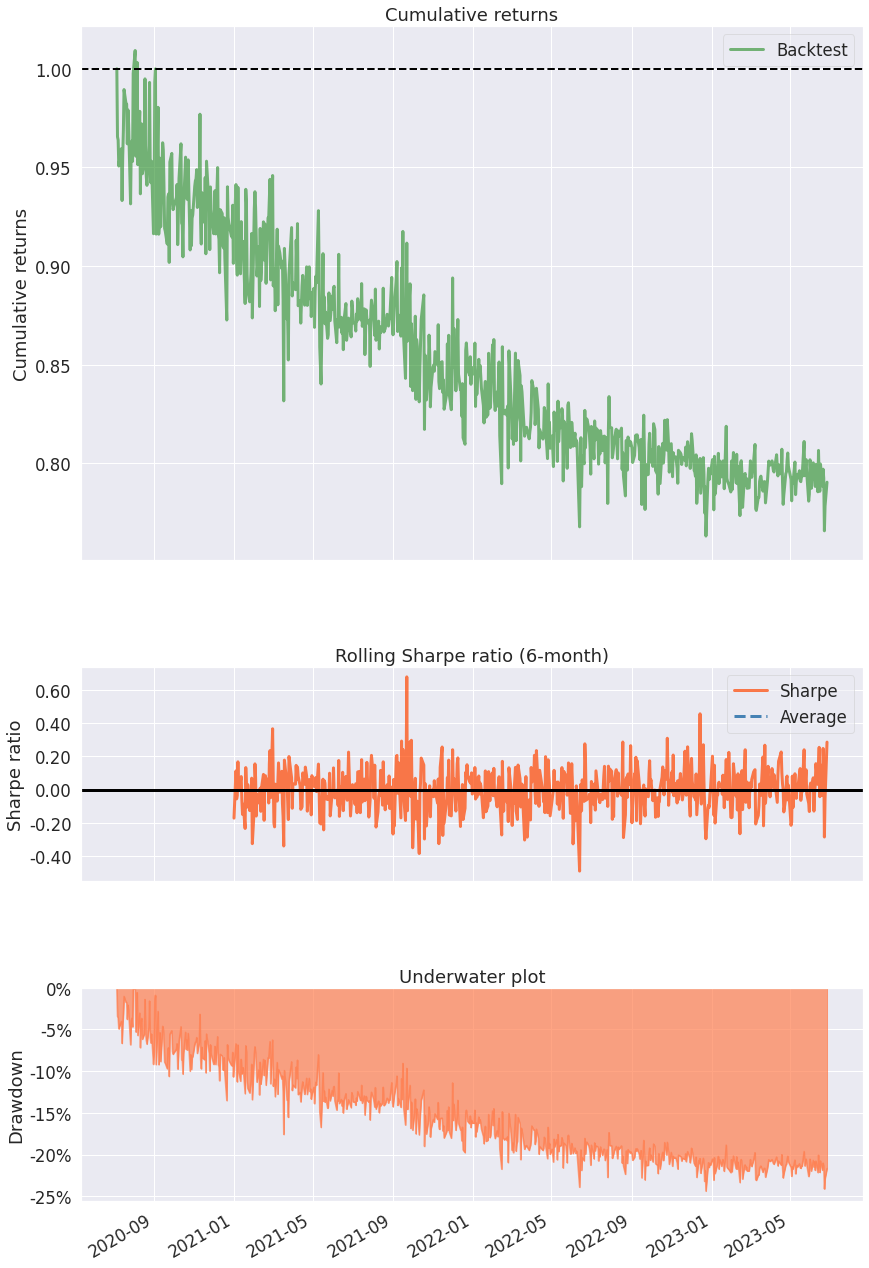

In [12]:

pf.create_simple_tear_sheet(daily_returns['PortfolioReturn'].diff())